In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
import math
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [4]:
data = pd.read_csv('housing.csv')

In [5]:
data.head(10)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
5,0.08829 12.50 7.870 0 0.5240 6.0120 66...
6,0.14455 12.50 7.870 0 0.5240 6.1720 96...
7,0.21124 12.50 7.870 0 0.5240 5.6310 100...
8,0.17004 12.50 7.870 0 0.5240 6.0040 85...
9,0.22489 12.50 7.870 0 0.5240 6.3770 94...


In [7]:
data.shape

(505, 1)

In [8]:
column_name = ['CRIM' , 'ZN' , 'INDUS' , 'CHAS' , 'NOX' , 'RM' , 'AGE' , 'DIS' , 'RAD' , 'TAX' , 'PTRATIO' , 'B' , 'LSTAT' , 'MEDV']

In [9]:
data = pd.read_csv('housing.csv' , header = None , delimiter = r"\s+" , names = column_name)

In [10]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [11]:
data.shape

(506, 14)

In [12]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [16]:
def numeric_features(data):
    numeric_col = data.select_dtypes(include=np.number).columns.tolist()
    return data[numeric_col].head()
    
numeric_columns = numeric_features(data)
print("Numerical Features:")
print(numeric_columns)


Numerical Features:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [17]:
def categorical_features(data):
    categorical_col = data.select_dtypes(exclude=np.number).columns.tolist()
    return data[categorical_col].head()
    
categorical_columns = categorical_features(data)
print("Categorical Features:")
print(categorical_columns)


Categorical Features:
Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


In [18]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [21]:
data.tail(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391.0,19.2,396.90,21.14,19.7
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391.0,19.2,396.90,14.10,18.3
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391.0,19.2,396.90,12.92,21.2
499,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391.0,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0,0.585,6.027,79.7,2.4982,6,391.0,19.2,396.90,14.33,16.8
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [22]:
data['Housing_Price'] = data.MEDV

In [23]:
data.sort_values('Housing_Price' , ascending=False)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,Housing_Price
283,0.01501,90.0,1.21,1,0.401,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,50.0,50.0
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307.0,17.4,382.00,4.63,50.0,50.0
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0,50.0
370,6.53876,0.0,18.10,1,0.631,7.016,97.5,1.2024,24,666.0,20.2,392.05,2.96,50.0,50.0
371,9.23230,0.0,18.10,0,0.631,6.216,100.0,1.1691,24,666.0,20.2,366.15,9.53,50.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,45.74610,0.0,18.10,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,7.0,7.0
399,9.91655,0.0,18.10,0,0.693,5.852,77.8,1.5004,24,666.0,20.2,338.16,29.97,6.3,6.3
400,25.04610,0.0,18.10,0,0.693,5.987,100.0,1.5888,24,666.0,20.2,396.90,26.77,5.6,5.6
398,38.35180,0.0,18.10,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,5.0,5.0


In [25]:
data.drop("MEDV" , axis=1 , inplace=True)

In [26]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Housing_Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [28]:
data.shape

(506, 14)

In [30]:
data.nunique()

CRIM             504
ZN                26
INDUS             76
CHAS               2
NOX               81
RM               446
AGE              356
DIS              412
RAD                9
TAX               66
PTRATIO           46
B                357
LSTAT            455
Housing_Price    229
dtype: int64

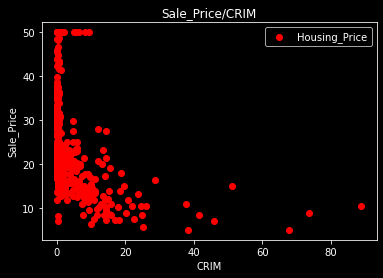

In [32]:
plt.scatter(data.CRIM, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('CRIM')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/CRIM")
plt.legend()
plt.show()

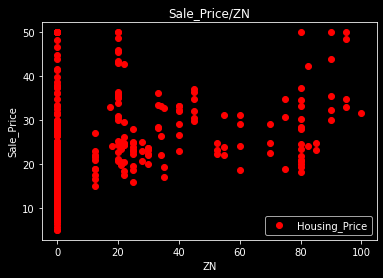

In [33]:
plt.scatter(data.ZN, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('ZN')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/ZN")
plt.legend()
plt.show()

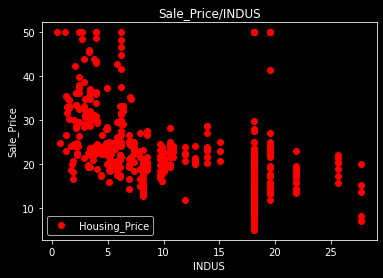

In [34]:
plt.scatter(data.INDUS, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('INDUS')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/INDUS")
plt.legend()
plt.show()

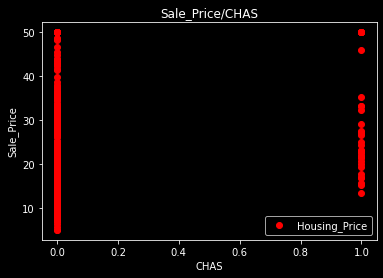

In [35]:
plt.scatter(data.CHAS, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('CHAS')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/CHAS")
plt.legend()
plt.show()

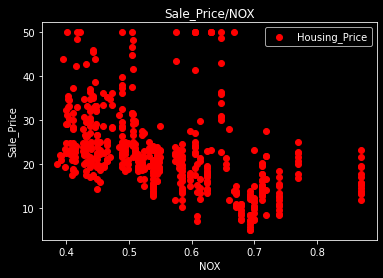

In [36]:
plt.scatter(data.NOX, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('NOX')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/NOX")
plt.legend()
plt.show()

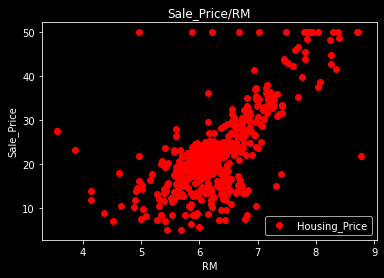

In [37]:
plt.scatter(data.RM, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('RM')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/RM")
plt.legend()
plt.show()

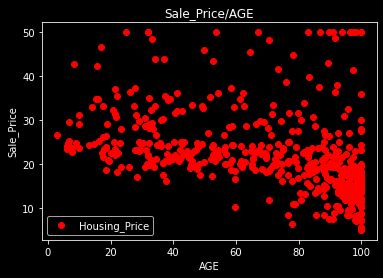

In [38]:
plt.scatter(data.AGE, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('AGE')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/AGE")
plt.legend()
plt.show()

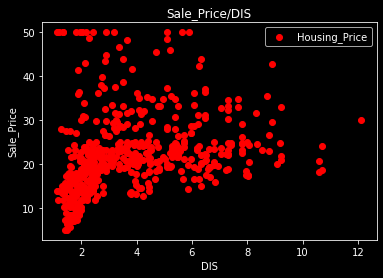

In [39]:
plt.scatter(data.DIS, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('DIS')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/DIS")
plt.legend()
plt.show()

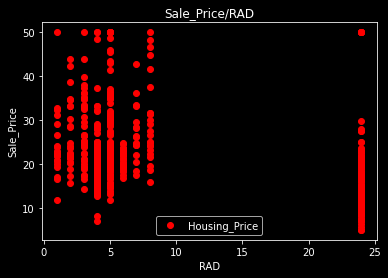

In [40]:
plt.scatter(data.RAD, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('RAD')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/RAD")
plt.legend()
plt.show()

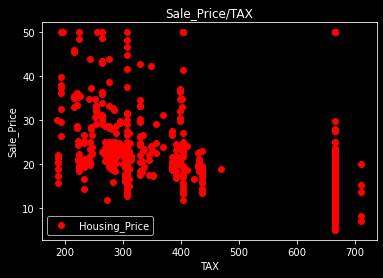

In [41]:
plt.scatter(data.TAX, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('TAX')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/TAX")
plt.legend()
plt.show()

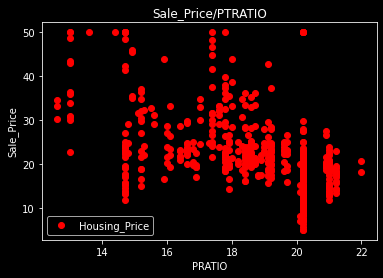

In [43]:
plt.scatter(data.PTRATIO, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('PRATIO')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/PTRATIO")
plt.legend()
plt.show()

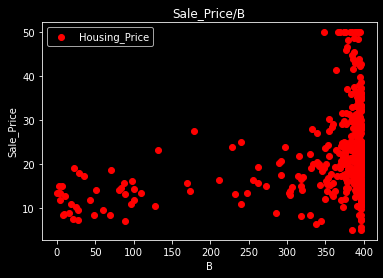

In [44]:
plt.scatter(data.B, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('B')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/B")
plt.legend()
plt.show()

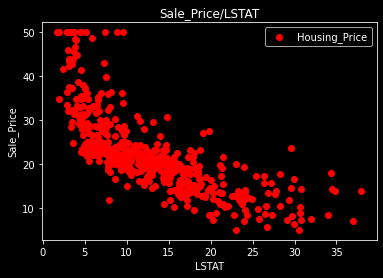

In [45]:
plt.scatter(data.LSTAT, data.Housing_Price, color = 'red', label = 'Housing_Price')
plt.xlabel('LSTAT')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/LSTAT")
plt.legend()
plt.show()

In [48]:
def detect_outliers(data):
    cols = list(data)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in data.select_dtypes(include=np.number).columns:
            q1 = data[column].quantile(0.25)
            q3 = data[column].quantile(0.75)
            iqr = q3 - q1
            low = q1 - (1.5*iqr)
            high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':data.loc[(data[column] < low) | (data[column] > high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(data)

,Feature,Number of Outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


In [83]:
print("First pass at checking target variable's distribution\n")

target = data['Housing_Price']

# check distribution
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

First pass at checking target variable's distribution



NameError: name 'norm' is not defined

In [ ]:
# check how many data points do I have
data_f = data[data['Housing_Price'] != 50] 
print(len(df_f))

target = df_f['MEDV']

# look at how these data is distributed - histogram
sns.distplot(target, fit=norm)
fig = plt.figure()
res = stats.probplot(target, plot=plt)

#skewness and kurtosis
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())